### Create models to predict whether a client will default on their next payment. Your group should work together and produce an ensemble model and then analyze the effectiveness of your model.

### Write a short report explaining your best ensemble model and the evaluation of that model. Consider what metrics you should use to evaluate your model.  At a minimum you should report F1 scores, ROC curve, and AUC, but you might also want to consider using  accuracy scores, confusion matrices, recall, precision, sensitivity, specificity, false positives, false negatives, Matthews correlation coefficient etc.   Please justify the evaluation metric(s) that you use. 

### Submit your report as a pdf.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

final_performances = []
final_algs = []

In [9]:
clients = pd.read_csv('credit_clients.csv')

In [10]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

ID: ID of each client 
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit 
SEX: Gender (1=male, 2=female) 
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 
MARRIAGE: Marital status (1=married, 2=single, 3=others) 
AGE: Age in years 
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) 
PAY_2: Repayment status in August, 2005 (scale same as above) 
PAY_3: Repayment status in July, 2005 (scale same as above) 
PAY_4: Repayment status in June, 2005 (scale same as above) 
PAY_5: Repayment status in May, 2005 (scale same as above) 
PAY_6: Repayment status in April, 2005 (scale same as above) 
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) 
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) 
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) 
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) 
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) 
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) 
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) 
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) 
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) 
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) 
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) 
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) 
default.payment.next.month: Default payment (1=yes, 0=no)

In [11]:
clients.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
#df = df.fillna(df.mean())
x = clients.iloc[:,1:23]
y = clients.iloc[:,24]
poly = PolynomialFeatures(interaction_only=True)
x = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [13]:
log = LogisticRegression(solver='lbfgs')

In [14]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.metrics import classification_report

y_pred = log.predict(x_test)
log_test_pred = [value for value in y_pred]

y_pred = log.predict(x_train)
log_train_pred = [value for value in y_pred]

print(log.score(x_test,y_test))
print(log.score(x_train, y_train))

print(f1_score(log_test_pred,y_test))
print(classification_report(log_test_pred,y_test))

0.774
0.7736666666666666
0.046413502109704644
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      5890
           1       0.03      0.30      0.05       110

    accuracy                           0.77      6000
   macro avg       0.50      0.54      0.46      6000
weighted avg       0.97      0.77      0.86      6000



0.5414261460101868


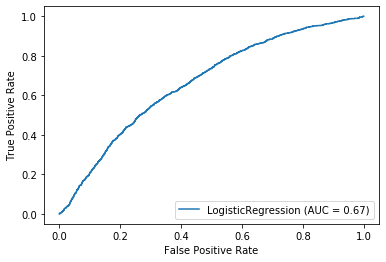

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(log_test_pred,y_test))
plot_roc_curve(log,x_test,y_test)

In [55]:
confusion_matrix(log_test_pred,y_test)

array([[4611, 1279],
       [  77,   33]])

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'random_state':[42]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(x_train, y_train)

print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf.fit(x_train, y_train); #n_estimators is the number of decision trees being used.

Training Accuracy: 0.9931666666666666
Testing Accuracy: 0.8165


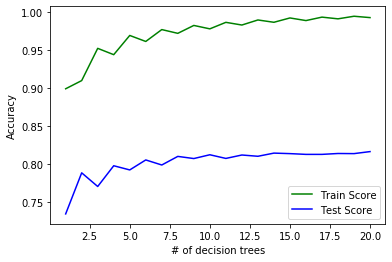

In [18]:
print("Training Accuracy:",rf.score(x_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", rf.score(x_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 21):
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    rf.fit(x_train, y_train)
    train_score_array.append(rf.score(x_train, y_train))
    test_score_array.append(rf.score(x_test, y_test))
x_axis = range(1,21) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('# of decision trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = rf.predict(x_test)
rf_test_pred = [value for value in y_pred]

y_pred = rf.predict(x_train)
rf_train_pred = [value for value in y_pred]

In [19]:
print(f1_score(rf_test_pred,y_test))
print(classification_report(rf_test_pred,y_test))

0.4688856729377713
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5239
           1       0.37      0.64      0.47       761

    accuracy                           0.82      6000
   macro avg       0.66      0.74      0.68      6000
weighted avg       0.87      0.82      0.84      6000



0.7404848504306251


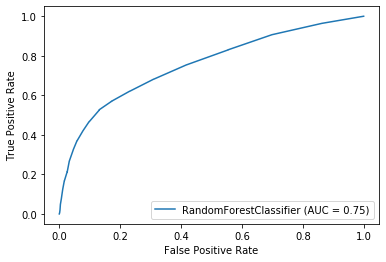

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(rf_test_pred,y_test))
plot_roc_curve(rf,x_test,y_test)

In [56]:
confusion_matrix(rf_test_pred,y_test)

array([[4413,  826],
       [ 275,  486]])

### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

for k in range (1, 10):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

In [21]:
y_pred = knn.predict(x_test)
knn_test_pred = [value for value in y_pred]

y_pred = knn.predict(x_train)
knn_train_pred = [value for value in y_pred]

print(f1_score(knn_test_pred,y_test))
print(classification_report(knn_test_pred,y_test))

0.25013774104683195
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      5497
           1       0.17      0.45      0.25       503

    accuracy                           0.77      6000
   macro avg       0.56      0.63      0.56      6000
weighted avg       0.88      0.77      0.81      6000



0.6269559286088093


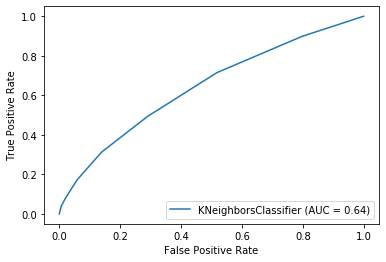

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(knn_test_pred,y_test))
plot_roc_curve(knn,x_test,y_test)

In [57]:
confusion_matrix(knn_test_pred,y_test)

array([[4412, 1085],
       [ 276,  227]])

### XGBoost

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

print("Training Accuracy:", xgb.score(x_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", xgb.score(x_test, y_test)) # Accuracy of the test.

Training Accuracy: 0.826875
Testing Accuracy: 0.8285


In [27]:
y_pred = xgb.predict(x_test)
xgb_test_pred = [value for value in y_pred]
    
y_pred = xgb.predict(x_train)
xgb_train_pred = [value for value in y_pred]

print(f1_score(xgb_test_pred,y_test))
print(classification_report(xgb_test_pred,y_test))

0.48933002481389576
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5297
           1       0.38      0.70      0.49       703

    accuracy                           0.83      6000
   macro avg       0.67      0.77      0.69      6000
weighted avg       0.89      0.83      0.85      6000



0.7733322036601947


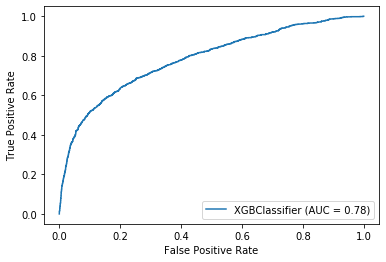

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(xgb_test_pred,y_test))
plot_roc_curve(xgb,x_test,y_test)

In [58]:
confusion_matrix(xgb_test_pred,y_test)

array([[4478,  819],
       [ 210,  493]])

### Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator = rf, n_estimators=10)
bag.fit(x_train, y_train)

print("Training Accuracy:",bag.score(x_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", bag.score(x_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.9479166666666666
Testing Accuracy: 0.8226666666666667


In [29]:
y_pred = bag.predict(x_test)
bag_test_pred = [value for value in y_pred]

y_pred = bag.predict(x_train)
bag_train_pred = [value for value in y_pred]

print(f1_score(bag_test_pred,y_test))
print(classification_report(bag_test_pred,y_test))

0.491395793499044
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5220
           1       0.39      0.66      0.49       780

    accuracy                           0.82      6000
   macro avg       0.67      0.75      0.69      6000
weighted avg       0.87      0.82      0.84      6000



0.753050397877984


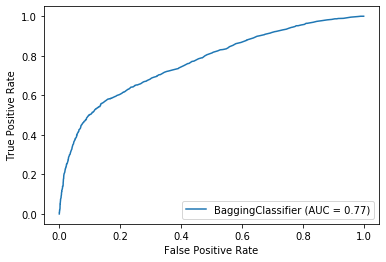

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(bag_test_pred,y_test))
plot_roc_curve(bag,x_test,y_test)

In [59]:
confusion_matrix(bag_test_pred,y_test)

array([[4422,  798],
       [ 266,  514]])

### Boosting

In [31]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(base_estimator = rf, n_estimators=10)
boost.fit(x_train, y_train)

print("Training Accuracy:",boost.score(x_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", boost.score(x_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.9994166666666666
Testing Accuracy: 0.8173333333333334


In [32]:
y_pred = boost.predict(x_test)
boost_test_pred = [value for value in y_pred]

y_pred = boost.predict(x_train)
boost_train_pred = [value for value in y_pred]

print(f1_score(boost_test_pred,y_test))
print(classification_report(boost_test_pred,y_test))

0.4780952380952381
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5212
           1       0.38      0.64      0.48       788

    accuracy                           0.82      6000
   macro avg       0.66      0.74      0.68      6000
weighted avg       0.87      0.82      0.84      6000



0.740822623309738


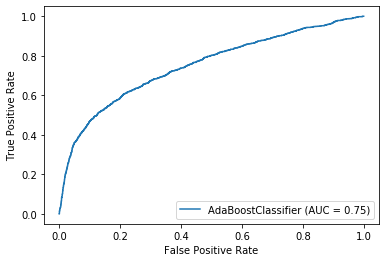

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(boost_test_pred,y_test))
plot_roc_curve(boost,x_test,y_test)

In [60]:
confusion_matrix(boost_test_pred,y_test)

array([[4402,  810],
       [ 286,  502]])

### Stacking

In [33]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('bag', bag), ('boost', boost)])
stack.fit(x_train,y_train)
stack.score(x_test, y_test)

0.8275

In [34]:
y_pred = stack.predict(x_test)
stack_test_pred = [round(value) for value in y_pred]

y_pred = stack.predict(x_train)
stack_train_pred = [round(value) for value in y_pred]

print(f1_score(stack_test_pred, y_test))
print(classification_report(stack_test_pred, y_test))

0.49090014756517464
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5279
           1       0.38      0.69      0.49       721

    accuracy                           0.83      6000
   macro avg       0.67      0.77      0.69      6000
weighted avg       0.88      0.83      0.85      6000



0.7690439364198921


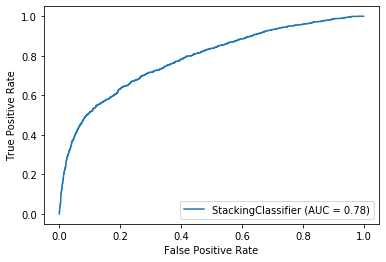

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(stack_test_pred,y_test))
plot_roc_curve(stack,x_test,y_test)

In [61]:
confusion_matrix(stack_test_pred,y_test)

array([[4466,  813],
       [ 222,  499]])

### Voting

In [47]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('bag', bag), ('boost', boost)], voting='hard')
vc.fit(x_train, y_train)

y_pred = vc.predict(x_test)
test_predictions = [round(value) for value in y_pred]
    
y_pred = vc.predict(x_train)
train_predictions = [round(value) for value in y_pred]

print("Training Accuracy:",vc.score(x_train, y_train)) # Accuracy of the model when training.
print("Testing Accuracy:", vc.score(x_test, y_test) ) # Accuracy of the test.
final_performances.append(vc.score(x_test,y_test))
final_algs.append("Voting")

Training Accuracy: 0.9497083333333334
Testing Accuracy: 0.8266666666666667


In [54]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_predictions, y_test))

0.7683807986471425


In [52]:
from sklearn.metrics import classification_report

print(f1_score(test_predictions,y_test))
print(classification_report(test_predictions, y_test))

0.48514851485148514
              precision    recall  f1-score   support

           0       0.95      0.84      0.90      5292
           1       0.37      0.69      0.49       708

    accuracy                           0.83      6000
   macro avg       0.66      0.77      0.69      6000
weighted avg       0.89      0.83      0.85      6000



In [63]:
confusion_matrix(test_predictions,y_test)

array([[4470,  822],
       [ 218,  490]])